# Predicting heart disease using Machine Learning
This nootebook looks into various Pyhton based ML and datascience libraries in an attempt to build Machine Learning model capable of predicting heart disease

**Problem Definition**
> Given Clinical parameters of patients, can we predict whether or not they have heart disease?

 0. Problem Definition
 1. Data
 2. Evaluate
 3. Features
 4. Modelling
 5. Expirimentation
 

**Data**
* The Original Data from UCI ML repository (Cleveland)
* Also availible on Kaggle https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

**Attribute information**

* age (in years)
* sex (1:male,0:female)
* cp : (chest pain type (4 values))
    1) 0: Typical agnina : less blood supply to heart 
    2) 1: Atypical agnia : not related to heart
    3) 2: Non-agnial pain : Esophageal spasms
    4) 3: Asymptomatic : Chest pain not showing signs of disease
* trestbps : resting blood pressure
* chol : serum cholestoral in mg/dl
* fbs : fasting blood sugar > 120 mg/dl
* restcg : resting electrocardiographic results (values 0,1,2)
* thalach maximum heart rate achieved
* exang : exercise induced angina (1:Yes ,0:No)
* oldpeak = ST depression induced by exercise relative to rest
* slope :the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal : thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

**Evaluaion metric**
> If we can get a figure upto 95% accuracy in prediction of heart disease the project will be qualified

# Importing the tools necessary

We're about to import tools and modules which will be used in our project

fig.savefig('./images/Heartdisease.png')

In [192]:
# Exploratory Data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay,roc_curve

In [193]:
# Reading CSV
heart_disease = pd.read_csv("./data/heart.csv")
heart_disease.head() # want to predic target

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [194]:
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [195]:
heart_disease.shape

(1025, 14)

# Exploratory Data analysis

EDA to become more familier to the data to brcome expert on the dataset

**Checklist can change according to problems**

1. What questions are we trying to solve
2. What kind of data do we have and how to treat (numeric and categorical)
3. What is missing from data and how to resolve it ?
4. What are the outliers and how to treat them
5. How can we ass,change features to get more out of our data

In [196]:
heart_disease['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

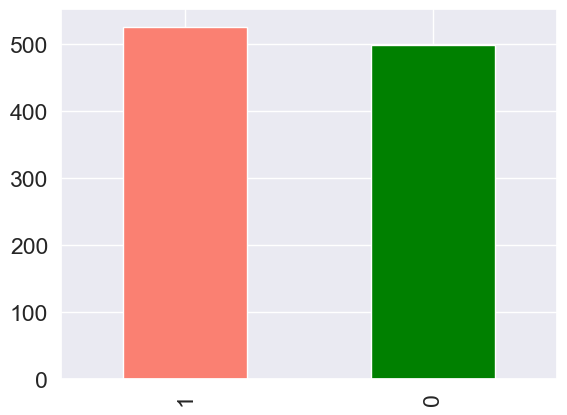

In [197]:
heart_disease['target'].value_counts().plot(kind='bar',color =["salmon","green"])
plt.savefig("./images/count.png", bbox_inches='tight');

In [198]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [199]:
heart_disease.isna().sum() # to check null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [200]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart disease frequency based on sex

In [201]:
heart_disease['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [202]:
pd.crosstab(heart_disease.target,heart_disease.sex)

sex,0,1
target,,
0,86,413
1,226,300


In [203]:
prob_f = (226/312)*100
prob_m =(300/712)*100
print(f' Probablity that a male have heart disease = {prob_m}%,\n Probablity that a female have heart disease = {prob_f}%,\n probality that any person win dataset has heart disease = {((300+226)/1024)*100}%')

 Probablity that a male have heart disease = 42.13483146067416%,
 Probablity that a female have heart disease = 72.43589743589743%,
 probality that any person win dataset has heart disease = 51.3671875%


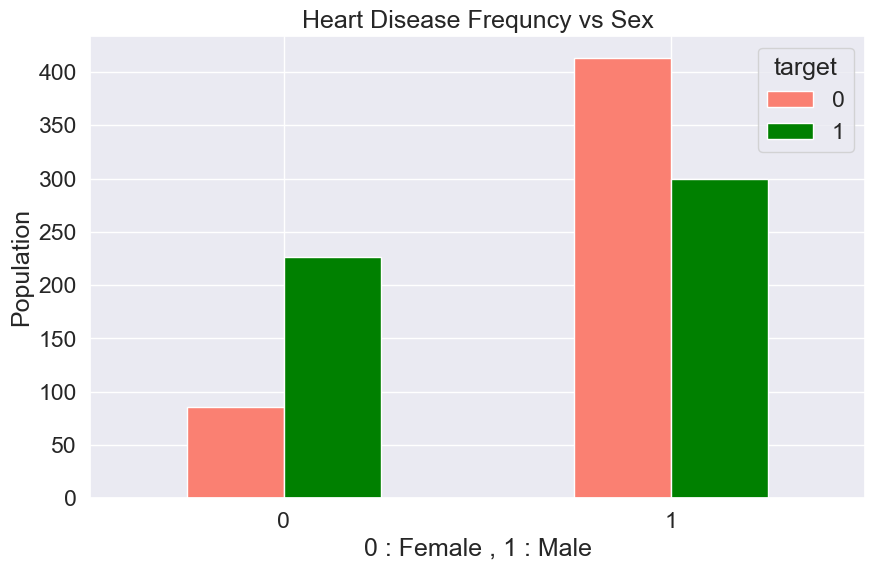

In [205]:
pd.crosstab(heart_disease.sex,heart_disease.target).plot(kind="bar",figsize=(10,6),color =["salmon",'green'],title=("Heart Disease Frequncy vs Sex"),xlabel=("0 : Female , 1 : Male"),ylabel=("Population"),legend=(['No Disease','Heart Disease']),rot=0);
# plt.title("Heart Disease Frequncy vs Sex")
# plt.xlabel("0 : Female , 1 : Male")
# plt.ylabel("Population")
# plt.legend(['No Disease','Heart Disease']);
# plt.xticks(rotation = 0)
plt.savefig("./images/Heart_Disease_basedonsex.png", bbox_inches='tight');

TypeError: 'str' object is not callable

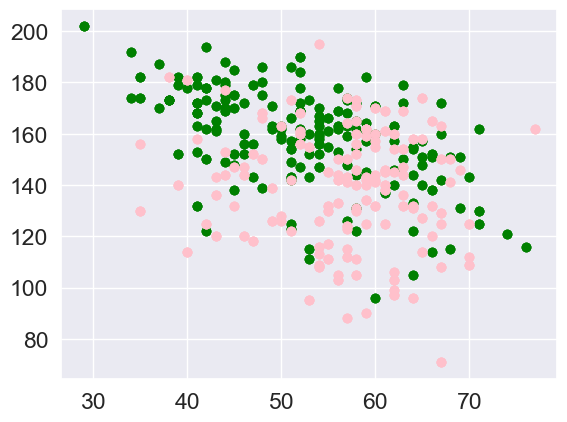

In [209]:
plt.scatter(heart_disease.age[heart_disease.target == 1], heart_disease.thalach[heart_disease.target == 1], color="green")
plt.scatter(heart_disease.age[heart_disease.target == 0], heart_disease.thalach[heart_disease.target == 0], color="pink")
plt.title("Heart disease in terms of Age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.show()


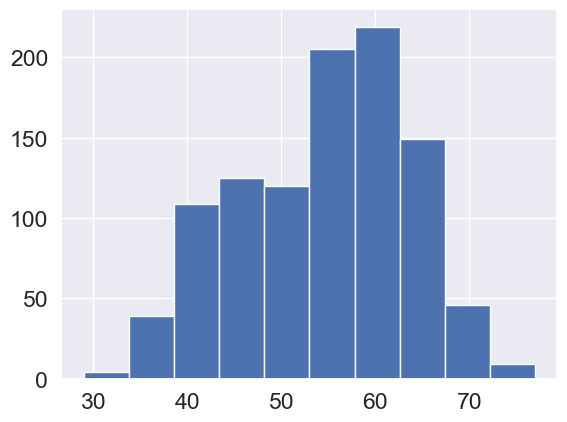

In [ ]:
# checking i age is normally distributed 
plt.hist(heart_disease['age']);
plt.savefig("./images/age.png", bbox_inches='tight');

In [ ]:
pd.crosstab(heart_disease.cp,heart_disease.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

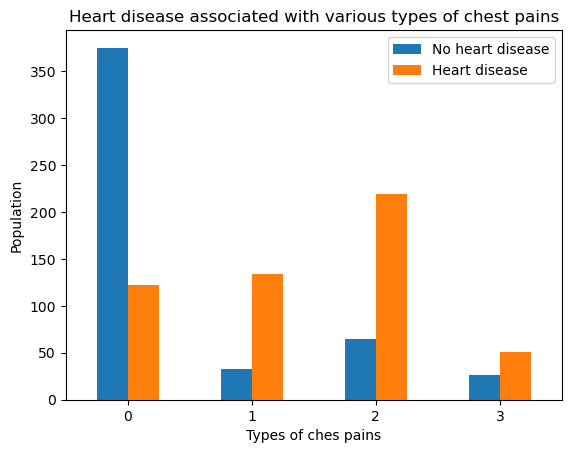

In [ ]:
pd.crosstab(heart_disease.cp,heart_disease.target).plot(kind='bar')
plt.title("Heart disease associated with various types of chest pains")
plt.xlabel("Types of ches pains")
plt.ylabel("Population")
plt.legend(["No heart disease","Heart disease"])
plt.xticks(rotation = 0);

In [ ]:
corr_matrix = heart_disease.corr()


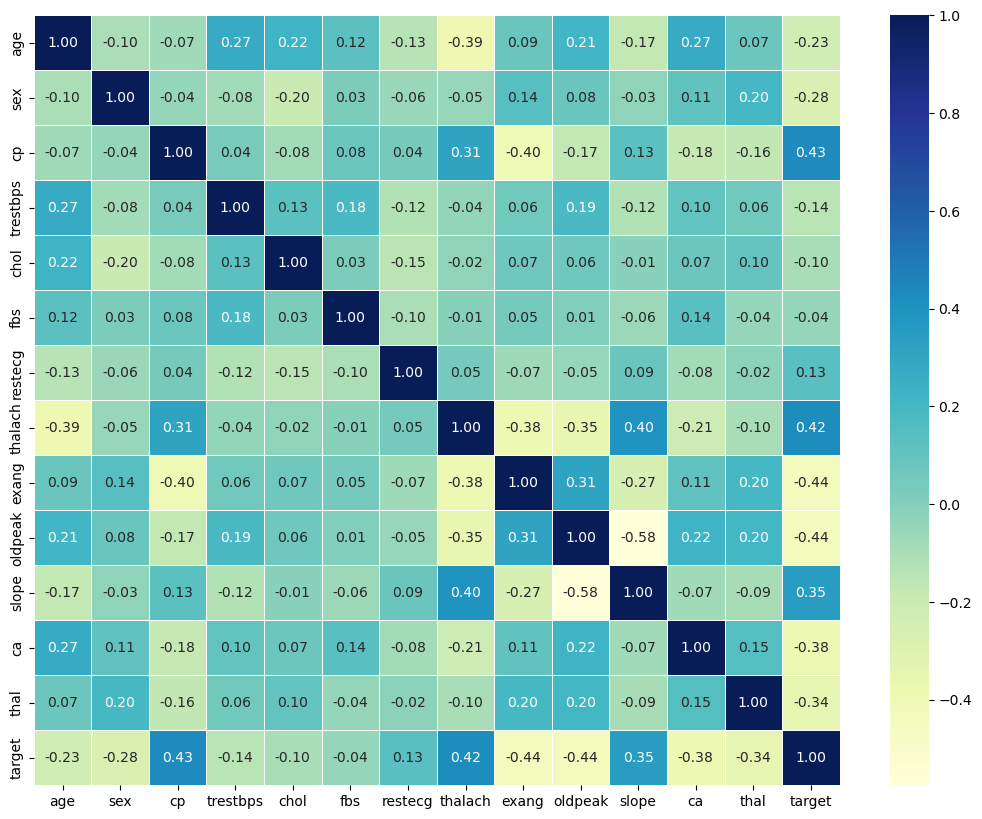

In [ ]:
fig,ax = plt.subplots(figsize = (13,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt='.2f',cmap="YlGnBu")

# Modelling 

In [ ]:
np.random.seed(72)
X = heart_disease.drop("target", axis = 1) #feature matrix

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
Y = heart_disease['target']
(Y==0).sum() 

499

In [ ]:
np.random.seed(72)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3) 

In [ ]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((717, 13), (717,), (308, 13), (308,))

In [ ]:
X.shape[0]*0.7 #x_train size

717.5

In [ ]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
95,45,0,0,138,236,0,0,152,1,0.2,1,0,2
507,41,0,1,130,204,0,0,172,0,1.4,2,0,2
804,58,0,0,130,197,0,1,131,0,0.6,1,0,2
479,58,1,0,128,216,0,0,131,1,2.2,1,3,3
714,51,1,3,125,213,0,0,125,1,1.4,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,56,1,1,120,236,0,1,178,0,0.8,2,0,2
74,48,1,0,130,256,1,0,150,1,0.0,2,2,3
46,41,1,1,135,203,0,1,132,0,0.0,1,0,1
787,51,1,0,140,298,0,1,122,1,4.2,1,3,3


In [ ]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
419,65,0,2,160,360,0,0,151,0,0.8,2,0,2
499,46,0,2,142,177,0,0,160,1,1.4,0,0,2
648,71,0,0,112,149,0,1,125,0,1.6,1,0,2
651,41,1,1,120,157,0,1,182,0,0.0,2,0,2
239,62,0,0,150,244,0,1,154,1,1.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2
113,57,1,0,110,335,0,1,143,1,3.0,1,1,3
893,52,1,0,128,204,1,1,156,1,1.0,1,0,0
603,63,0,1,140,195,0,1,179,0,0.0,2,2,2


**Now e have split in X and Y**
we will now train ML model on a training dataset and Use the following patterns found to test the estimations on testing dataset

**We are going to try following Models**
1. Locistic Regression
2. k-nearest neighbours classfier
3. Random Forest Classifier

In [ ]:
# Placing models in dictionary

models = {"Logistic":LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Rf" : RandomForestClassifier()}

# Defining a function
def evaluate(model,X_train,X_test,Y_train,Y_test):
    '''
    Fits and evaluates maching learning model score  5 parameters
    model : dict of various models to try
    X_train : Training dataset if features
    X_test : Testing dataset of features 
    Y_train : Training dataset of labels
    Y_test : Testing dataset of labels 
    '''
    np.random.seed(72)
    model_score = {} # to store the results
    for name,mod in models.items():
        mod.fit(X_train,Y_train)
        model_score[name]=mod.score(X_test,Y_test)
    return model_score

In [ ]:
model_score = evaluate(models,X_train,X_test,Y_train,Y_test)
model_score

c:\Users\vedant\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic': 0.827922077922078, 'KNN': 0.7207792207792207, 'Rf': 1.0}

In [ ]:
df = pd.DataFrame(model_score,index=["Accuracy"])
df

,Logistic,KNN,Rf
Accuracy,0.827922,0.720779,1.0


<Axes: >

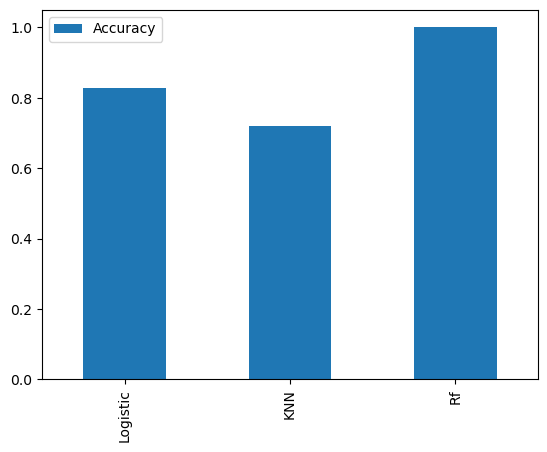

In [ ]:
df.T.plot.bar()

**Based only on results baseline model may not give accurate results wo we need an evaluation methods or metrics as well as we can even try hyper parameter tuning**

1. Hyperparameter tuning
2. Feature Importance
3. Confusion-matrix
4. Cross-validation
5. Precesion
6. Recall
7. F1
8. Roc curve
9. Area under curve

**KNN**

In [ ]:
train_score = []
test_score = []
for i in range(1,21): # more time complexity
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    train_score.append(knn.score(X_train,Y_train))
    test_score.append(knn.score(X_test,Y_test))

In [ ]:
n_neighbors = list(range(1,21))
n_neighbors

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0'),
  Text(22.5, 0, '22.5')])

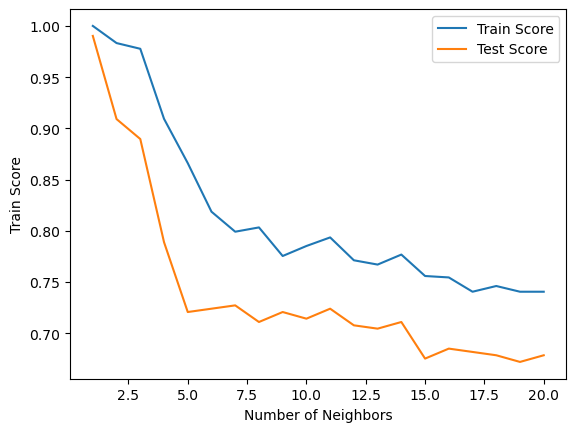

In [ ]:
plt.plot(n_neighbors,train_score,label="Train Score")# plot list to list
plt.plot(n_neighbors,test_score,label="Test Score")# plot list to list
plt.xlabel("Number of Neighbors")
plt.ylabel("Train Score")
plt.legend()
plt.xticks(rotation = 0)

Even after hyperparameter tuning it score has not improved efficiently

**Logistic Regression and Random forest regression using** `RandomizedSearchCV`

In [ ]:
log_red_grid = {'C':np.logspace(-4,4,20),'solver':["liblinear"]}
rf_grid = {"n_estimators": [10,15,20]
        ,"max_depth" : [None,3,5]
        ,"min_samples_split":[2,4,6,8,10]
        ,"min_samples_leaf":[1,3,5,7,9]}

In [ ]:
np.random.seed(78)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_red_grid,cv=5,n_iter=10,verbose=True)
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [ ]:
rs_log_reg.best_score_

0.8520881895881895

In [ ]:
np.random.seed(78)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=10,verbose=True)
rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5],
                                        'min_samples_leaf': [1, 3, 5, 7, 9],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [10, 15, 20]},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 15,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': None}

In [ ]:
rs_rf.best_score_ #good score

0.9567210567210566

# Evaluating RandomForestClassifier further 
* ROC and AUC curve
* Confusion Matrix
* Classification Report
* Prcesion
* Recall 
* f1 score

In [ ]:
y_predictied = rs_rf.predict(X_test)
y_predictied

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,

In [ ]:
Y_test

419    1
499    1
648    1
651    1
239    0
      ..
83     1
113    0
893    0
603    1
57     1
Name: target, Length: 308, dtype: int64

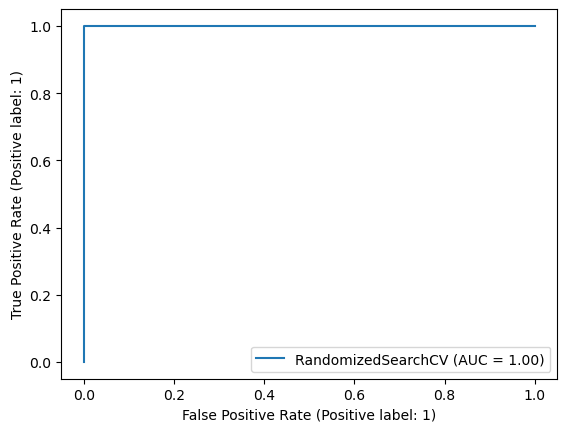

In [ ]:
RocCurveDisplay.from_estimator(rs_rf,X_test,Y_test)

In [ ]:
cm = confusion_matrix(Y_test,y_predictied)
cm

array([[147,   0],
       [  3, 158]], dtype=int64)

In [ ]:
sns.set(font_scale =1.5)
def plot_conf_mat (cm) :
    fig,ax = plt.subplots(figsize =(10,6))
    ax = sns.heatmap(cm,annot=True,fmt='d',cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicteed label")

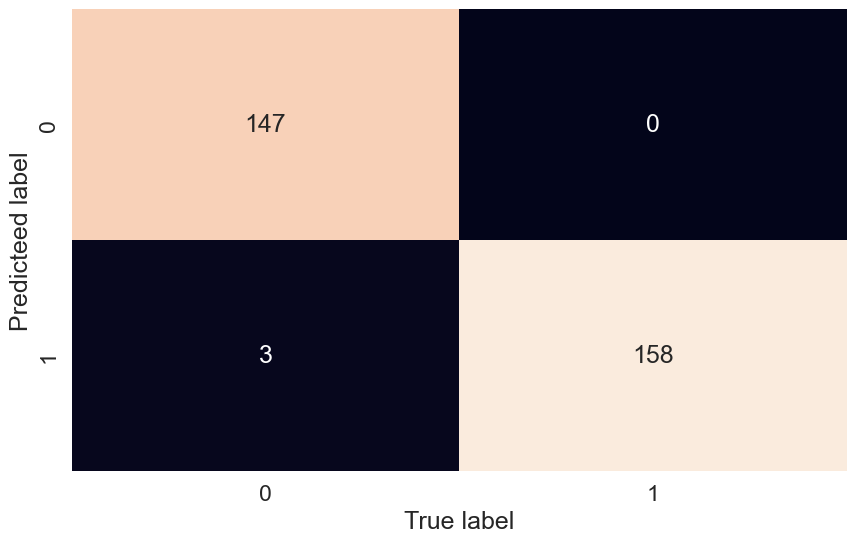

In [ ]:
plot_conf_mat(cm)

Now we have good results for  ROC curve , AUC metric and  a confusion matrix,
**Evaluateing the classification report as well as cross validated precision,recall and f score**


In [ ]:
print(classification_report(Y_test,y_predictied))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       147
           1       1.00      0.98      0.99       161

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



we will be using `cross_val_score()`

In [ ]:
rs_rf.best_params_

{'n_estimators': 15,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': None}

In [ ]:
clf = RandomForestClassifier(n_estimators = 15,
 min_samples_split = 4,
 min_samples_leaf = 1,
 max_depth = None)

In [ ]:
# cross validate accuracy
cv_acc = cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc.mean()#mean of the list

0.9834146341463414

In [ ]:
# cross validate precision
cv_pre = cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_pre.mean()#mean of the list

0.9888369678089305

In [ ]:
# cross validate recall
cv_recall = cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_recall.mean()#mean of the list

1.0

In [ ]:
# cross validate f1 score
cv_f1 = cross_val_score(clf,X,Y,cv=5,scoring="f1")
cv_f1.mean()#mean of the list

0.9812955024835001

# Feature importance

Which feature contributed most to our outcomes of the model and how did they contribute ?

In [ ]:
np.random.seed(78)
clf.fit(X_train,Y_train)
feature_dict=dict(zip(heart_disease.columns,list(clf.feature_importances_)))

In [ ]:
feature_dict

{'age': 0.07369458255413015,
 'sex': 0.02856762805296128,
 'cp': 0.1527100836907889,
 'trestbps': 0.07559082729382806,
 'chol': 0.059716566779398496,
 'fbs': 0.006777780326813606,
 'restecg': 0.020684113901375832,
 'thalach': 0.09697090272405004,
 'exang': 0.06102251041474209,
 'oldpeak': 0.10545467225615238,
 'slope': 0.04427146385576897,
 'ca': 0.17009663432207242,
 'thal': 0.10444223382791781}

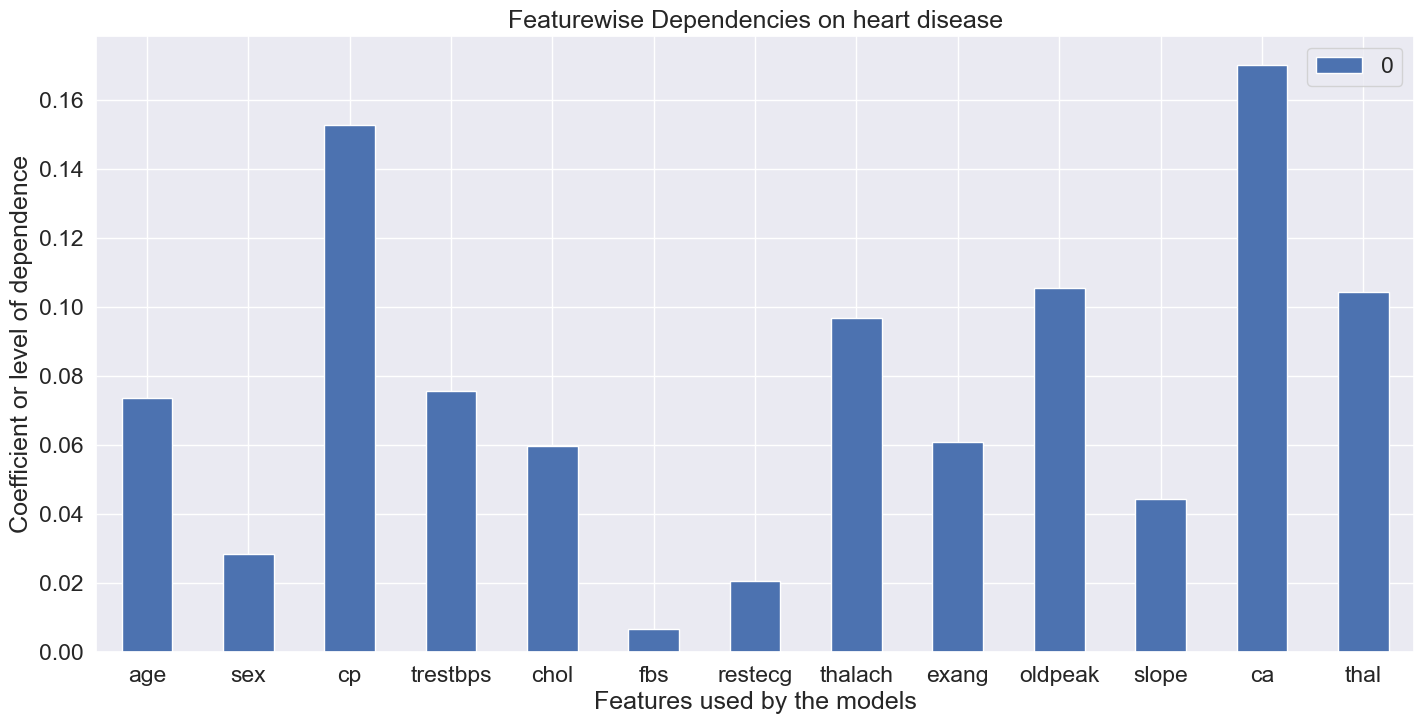

In [ ]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind='bar',figsize = (17,8),rot=0,title = "Featurewise Dependencies on heart disease",xlabel = "Features used by the models",ylabel = "Coefficient or level of dependence");

CP and Ca are highly importsnt features

# Expirimentation

**We have acheived a desirable model**
can upgrade in future
* Collecting more data
* Can try better model like CatBoost and XGBoost
* improve current model


In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open("./Trained_Model/heart_model.pkl","wb")) #wb stands for write binary